# Práctica 4: Optimización con Scipy

## 4.1. Optimización para una función no diferenciable pero convexa

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



Consideremos la función objetivo
$$
f ( x, y) = \sqrt{x^2 + y^2}
$$
que no es derivable en $(0, 0)$

In [11]:
def objective(v):
    x, y = v
    f = np.sqrt(x ** 2 + y ** 2)
    return f


Ahora la dibujamos:

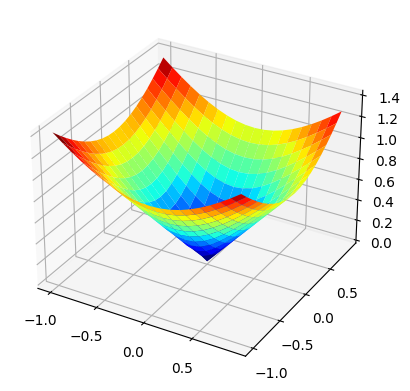

In [12]:
# ventana para dibujar
r_min, r_max = -1.0, +1.0
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)
# creamos la malla
x, y = np.meshgrid(xaxis, yaxis)
v = x, y
# evaluamos la función objetivo en los puntos de la malla
results = objective(v)
# dibujamos en 3D con el tipo de color jet
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, results, cmap='jet')
# mostramos el gráfico
plt.show()

Finalmente, optimizamos con el algoritmo de Powell

In [13]:
# Empezamos con la optimización

from scipy.optimize import minimize
# punto inicial para la optimización
initial_guess = r_min + np.random.rand(2) * (r_max - r_min)
# optimizamos
result = minimize(objective, initial_guess, method='powell')
# resumen de resultados
print('Estado : %s' % result['message'])
print('Número total de evaluaciones de la función objetivo: %d' % result['nfev'])
# evaluamos la solución
solution = result['x']
evaluation = objective(solution)
print('Solución: f(%s) = %.5f' % (solution, evaluation))




Estado : Optimization terminated successfully.
Número total de evaluaciones de la función objetivo: 226
Solución: f([8.14630531e-15 5.01064577e-12]) = 0.00000


## 4.2. Optimización para una función diferenciable pero no convexa

Consideramos ahora la llamada función de Ackley

$$
f(x,y) = -20*\exp(-0.2 * \sqrt{ 0.5 * (x^2 + y^2)} ) - \exp(0.5 * (\cos (2 * \pi * x) + \cos (2 * \pi * y))) + e + 20
$$
la cula dibujamos para observar que tiene muchos mínimos locales y un mínimo global en $(0, 0)$.

In [14]:
# función de Ackley
def ackley(v):
    x, y = v
    f = -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x ** 2 + y ** 2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20
    return f



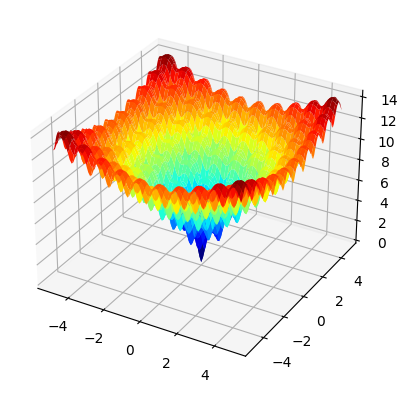

In [15]:
r_min, r_max = -5.0, 5.0 # ventana para dibujar
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)
# malla de puntos
x, y = np.meshgrid(xaxis, yaxis)
v = x, y
# evaluamos la función de Ackley en los puntos de la malla
results = ackley(v)
# dibujamos en 3D con el color tipo jet
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, results, cmap='jet')
# mostramos la gráfica
plt.show()

Al igual que antes, optimizamos con el algoritmo de Powell.
Como el initial guess lo elegimos random, ejecutamos varias vaces para ver la dependencia 
de los resultados respecto a la inicialización. Probamos también con el punto $[4., 4.]$, 
por ejemplo.

In [16]:
# punto inicial para la optimización
initial_guess = r_min + np.random.rand(2) * (r_max - r_min)
#initial_guess = np.array([4., 4.])
# optimizamos
result = minimize(ackley, initial_guess, method='powell')
# resumen de resultados
print('Estado : %s' % result['message'])
print('Número total de evaluaciones de la función objetivo: %d' % result['nfev'])
# evaluamos la solución
solution = result['x']
evaluation = objective(solution)
print('Solución: f(%s) = %.5f' % (solution, evaluation))

Estado : Optimization terminated successfully.
Número total de evaluaciones de la función objetivo: 242
Solución: f([2.86202112e-12 2.16863070e-12]) = 0.00000


## 4.3 Problemas con restricciones 

Resolver el siguiente problema de optimización no lineal

$$
\begin{array}{lll}
	\text{Minimizar} &  & f\left( x_1,x_2\right) =4x_1^2+x_2^2-x_1-2x_2 \\ 
	\text{sujeto a} &  &  \\ 
	&  & -2x_1-x_2 +1 \leq 0 \\
    &  & - x_1^2 +1 \leq 0 
\end{array}
$$

In [17]:
from scipy.optimize import minimize

def objective(x):
    x1 = x[0]
    x2 = x[1]
    return 4 * x1**2 + x2**2 - x1 - 2 * x2

def restr1(x):
    return -2 * x[0] - x[1] + 1

def restr2(x):
    return -x[0]**2 + 1

x0 = (1, 0)
print(f"Punto inicial:  {x0} ")
print(f"Valor de la función en el punto inicial: {objective(x0)}")
print()

con1 = {'type': 'ineq', 'fun':restr1}
con2 = {'type': 'ineq', 'fun':restr2}
cons= [con1,con2]

sol = minimize(objective, x0,  constraints=cons)

print(sol)


print(f"Solución: {sol.x}")
print (f"Valor alcanzado en la solución: {objective(sol.x)}")

Punto inicial:  (1, 0) 
Valor de la función en el punto inicial: 3

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.03125
       x: [ 6.250e-02  8.750e-01]
     nit: 5
     jac: [-5.000e-01 -2.500e-01]
    nfev: 16
    njev: 5
Solución: [0.0625 0.875 ]
Valor alcanzado en la solución: -1.03125
